In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
data_path = 'data/'

In [3]:
cities = pd.read_parquet(data_path + 'cities.parquet')
sales = pd.read_parquet(data_path + 'sales.parquet')
shops = pd.read_parquet(data_path + 'shops.parquet')

# Анализируем продажы

In [4]:
sales.head()

,date,shop_id,owner,number_of_counters,goods_type,total_items_sold
0,2146-01-01,0,Рейдеры,4,Съедобный хлам,6.0
1,2146-01-01,0,Рейдеры,4,Хлам,26.0
2,2146-01-01,0,Рейдеры,4,Бензак,10537.0
3,2146-01-01,1,Рейдеры,5,Съедобный хлам,17.0
4,2146-01-01,1,Рейдеры,5,Хлам,9.0


In [5]:
len(sales['shop_id'].unique())

845

Есть информация о 845 магазинах

In [6]:
sales['goods_type'].unique()

array(['Съедобный хлам', 'Хлам', 'Бензак', 'Броня и одежда', 'Солярка',
       'Ядер-Кола', 'Патроны', 'Модификации тачки', 'Оружие',
       'Жидкости для тачки', 'Медпрепараты и еда'], dtype=object)

Нормальный такой наборчик

In [7]:
sales.groupby('shop_id').apply(lambda x: len(x['number_of_counters'].unique()) == 1).value_counts()

False    596
True     249
dtype: int64

В некоторых магазинах количество прилавков одинаковое, в некоторых - нет

In [8]:
sales.groupby(['shop_id', 'date']).apply(lambda x: len(x['number_of_counters'].unique()) == 1).value_counts()

True    615736
dtype: int64

Количество прилавков одинаковое в определенном магазине в опредленный день для всех товаров

Приведем данные к широкому формату

In [9]:
sales_pivoted = pd.pivot_table(sales[['date', 'shop_id', 'goods_type', 'total_items_sold']], index = ['date', 'shop_id'], columns = 'goods_type')

In [10]:
sales_pivoted.columns = sales_pivoted.columns.get_level_values(1)

In [11]:
sales_pivoted = sales_pivoted.reset_index()

In [12]:
sales_pivoted.head()

goods_type,date,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола
0,2146-01-01,0,10537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,26.0,NaN
1,2146-01-01,1,5510.0,2.0,NaN,NaN,NaN,NaN,NaN,238.0,17.0,9.0,NaN
2,2146-01-01,2,5893.0,16.0,NaN,NaN,150.0,17.0,671.0,629.0,115.0,121.0,37.0
3,2146-01-01,3,14627.0,2.0,NaN,NaN,NaN,NaN,NaN,822.0,20.0,63.0,NaN
4,2146-01-01,4,15525.0,13.0,21.0,NaN,15.0,NaN,449.0,1011.0,281.0,68.0,146.0


Добавим информацию о количестве работающих прилавков

In [13]:
sales = sales[['date', 'shop_id', 'number_of_counters']].drop_duplicates(['date', 'shop_id']).reset_index(drop = True)

In [14]:
sales_pivoted = pd.merge(sales_pivoted, sales, on = ['date', 'shop_id'])

In [15]:
sales_pivoted.head()

,date,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола,number_of_counters
0,2146-01-01,0,10537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,26.0,NaN,4
1,2146-01-01,1,5510.0,2.0,NaN,NaN,NaN,NaN,NaN,238.0,17.0,9.0,NaN,5
2,2146-01-01,2,5893.0,16.0,NaN,NaN,150.0,17.0,671.0,629.0,115.0,121.0,37.0,4
3,2146-01-01,3,14627.0,2.0,NaN,NaN,NaN,NaN,NaN,822.0,20.0,63.0,NaN,4
4,2146-01-01,4,15525.0,13.0,21.0,NaN,15.0,NaN,449.0,1011.0,281.0,68.0,146.0,10


In [16]:
sales_pivoted['date'].max()

Timestamp('2147-12-31 00:00:00')

In [17]:
sales_pivoted.groupby('shop_id')['date'].max().sort_values()

shop_id
178   2147-11-30
181   2147-12-02
182   2147-12-19
180   2147-12-24
179   2147-12-24
         ...    
289   2147-12-31
290   2147-12-31
291   2147-12-31
267   2147-12-31
844   2147-12-31
Name: date, Length: 845, dtype: datetime64[ns]

In [18]:
sales_pivoted['date'].min()

Timestamp('2146-01-01 00:00:00')

In [19]:
sales_pivoted.groupby('shop_id')['date'].min().sort_values()

shop_id
0     2146-01-01
556   2146-01-01
557   2146-01-01
558   2146-01-01
559   2146-01-01
         ...    
285   2146-01-01
286   2146-01-01
287   2146-01-01
263   2146-01-01
844   2146-01-01
Name: date, Length: 845, dtype: datetime64[ns]

Для магазинов есть наблюдения с максимума 2146-01-01 до минимум 2147-11-30. Ограничим выборку данным промежутком чтобы все ряды были одинаковой длины. Это упростит дальнейший анализ

Проверим, есть ли пропущенные дни в данных о магазинах

In [20]:
def find_gaps(x):
    x['date_shifted'] = x['date'].shift(1)
    x['date_previous'] = x['date'] - pd.Timedelta('1 day')
    return x

In [21]:
sales = sales.sort_values(['shop_id', 'date'])
sales = sales.groupby('shop_id').apply(find_gaps).reset_index(drop = True)

In [22]:
sales[sales['date_shifted'] != sales['date_previous']]

,date,shop_id,number_of_counters,date_shifted,date_previous
0,2146-01-01,0,4,NaT,2145-12-31
730,2146-01-01,1,5,NaT,2145-12-31
1375,2147-10-10,1,5,2147-10-07,2147-10-09
1458,2146-01-01,2,4,NaT,2145-12-31
1970,2147-05-30,2,4,2147-05-27,2147-05-29
...,...,...,...,...,...
612817,2146-01-01,841,8,NaT,2145-12-31
613547,2146-01-01,842,7,NaT,2145-12-31
614277,2146-01-01,843,6,NaT,2145-12-31
615007,2146-01-01,844,8,NaT,2145-12-31


In [23]:
sales.iloc[615536-5:615536+5, :]

,date,shop_id,number_of_counters,date_shifted,date_previous
615531,2147-06-09,844,10,2147-06-08,2147-06-08
615532,2147-06-10,844,10,2147-06-09,2147-06-09
615533,2147-06-11,844,10,2147-06-10,2147-06-10
615534,2147-06-12,844,10,2147-06-11,2147-06-11
615535,2147-06-13,844,10,2147-06-12,2147-06-12
615536,2147-06-15,844,10,2147-06-13,2147-06-14
615537,2147-06-16,844,10,2147-06-15,2147-06-15
615538,2147-06-17,844,10,2147-06-16,2147-06-16
615539,2147-06-18,844,10,2147-06-17,2147-06-17
615540,2147-06-19,844,10,2147-06-18,2147-06-18


Например в магазине 2 пропущены 28 и 29 числа. Заполним пропущенные даты.

In [24]:
shops

,shop_id,neighborhood,city,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type
0,705,В центре,Крепость Джита,2109,нет,да,да,1
1,601,В центре,Суховей,2137,нет,нет,нет,4
2,530,В центре,Храм Фритюра,2118,нет,нет,нет,None
3,91,В центре,Убежище Жестянщика,2135,нет,нет,да,1
4,100,На отшибе,Убежище Жестянщика,2135,да,нет,да,2
...,...,...,...,...,...,...,...,...
840,663,У тоннеля,Темница,2139,нет,нет,нет,4
841,804,В центре,Пасть,-1,нет,None,None,4
842,272,У ночлега,Крепость Джита,2117,нет,нет,нет,3
843,715,У ночлега,Крепость Джита,2123,нет,нет,нет,3


In [25]:
def filling_gaps(x):
    dates = list(pd.date_range('2146-01-01 00:00:00', '2147-11-30 00:00:00'))
    dates = pd.DataFrame({'date': dates})
    x = pd.merge(x, dates, on = 'date', how = 'right')
    return x

In [26]:
sales_pivoted = sales_pivoted.groupby('shop_id').apply(filling_gaps).reset_index(drop = True)

In [27]:
sales_pivoted.head()

,date,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола,number_of_counters
0,2146-01-01,0.0,10537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,26.0,NaN,4.0
1,2146-01-02,0.0,14107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,4.0
2,2146-01-03,0.0,16092.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,17.0,NaN,4.0
3,2146-01-04,0.0,18050.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,70.0,NaN,4.0
4,2146-01-05,0.0,18456.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,6.0,NaN,4.0


Будем считать, что если пропущена информация о продажах, то товары в этот день не продавались

In [28]:
sales_pivoted = sales_pivoted.fillna(0)
sales_pivoted.head()

,date,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола,number_of_counters
0,2146-01-01,0.0,10537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,26.0,0.0,4.0
1,2146-01-02,0.0,14107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,4.0
2,2146-01-03,0.0,16092.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,17.0,0.0,4.0
3,2146-01-04,0.0,18050.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,70.0,0.0,4.0
4,2146-01-05,0.0,18456.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,6.0,0.0,4.0


In [29]:
palette = sns.color_palette("tab10")

In [30]:
sampled_shops = np.random.choice(shops['shop_id'].values, 10, replace = False)

In [31]:
sampled_shops

array([465, 788, 434,  20, 647, 523, 553, 676, 752, 695])

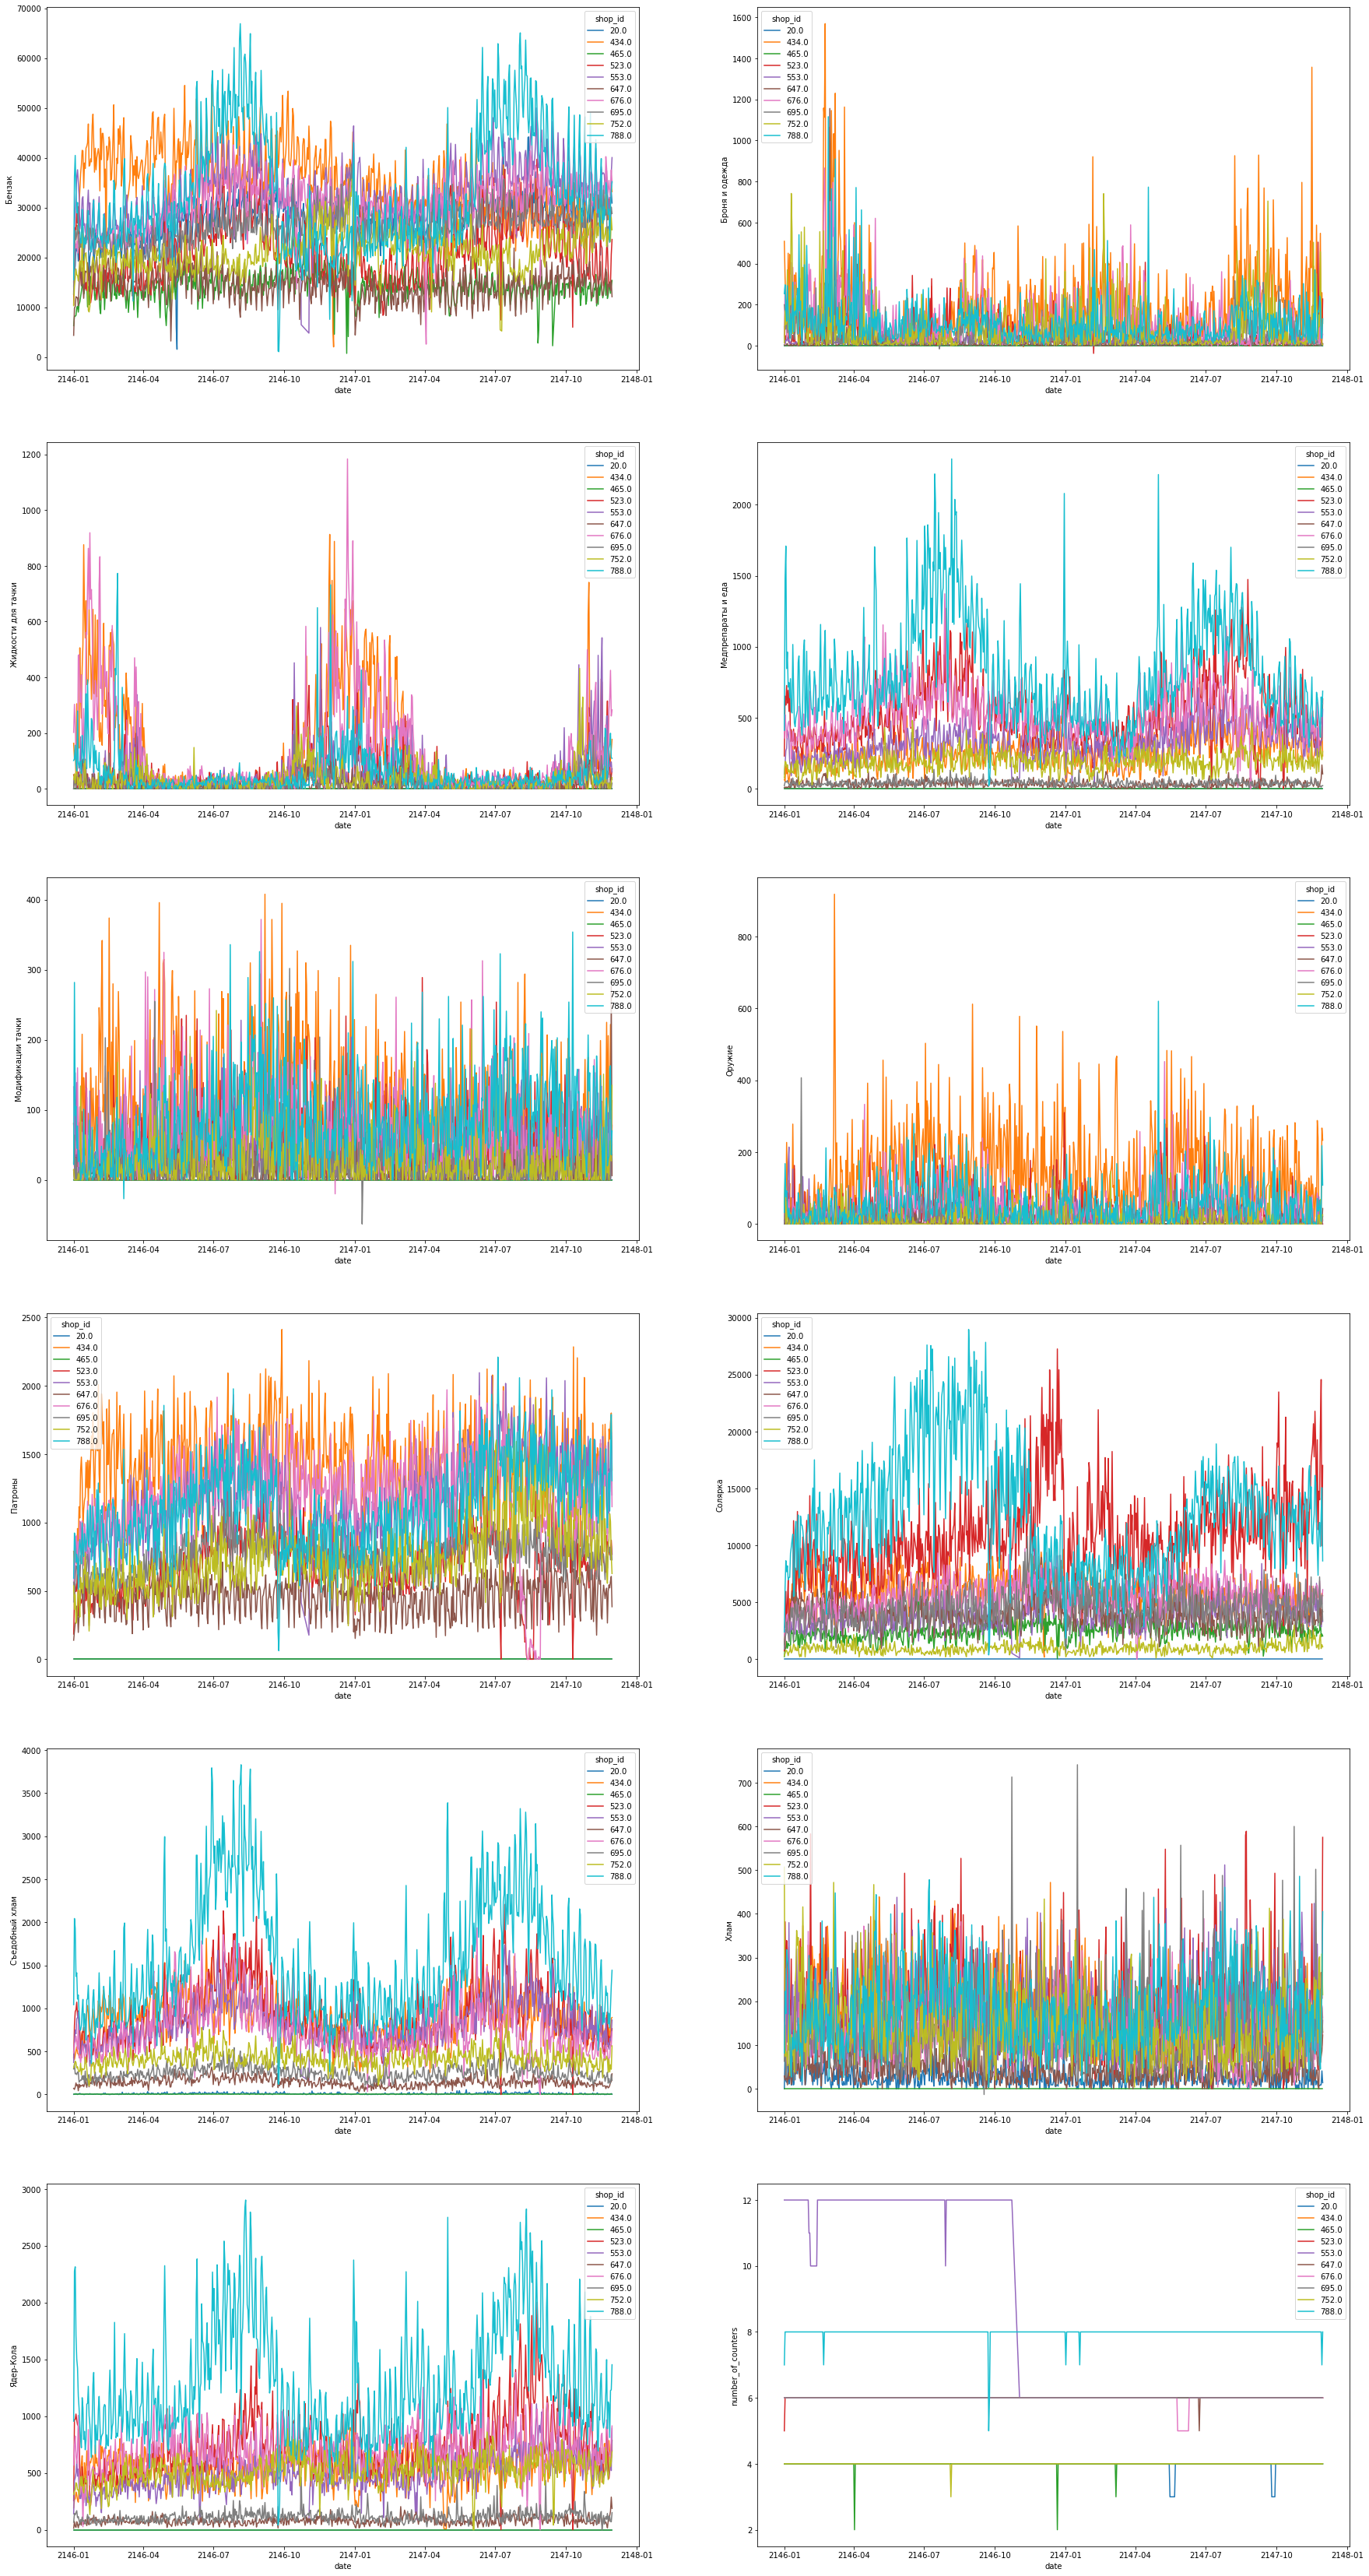

In [32]:
fig, ax = plt.subplots(6, 2, figsize = (30, 60))
row = 0
col = 0
for col_name in sales_pivoted.columns[2:]:
    _ = sns.lineplot(x = 'date', 
                     y = col_name, 
                     data = sales_pivoted[sales_pivoted['shop_id'].isin(sampled_shops)],
                     hue = 'shop_id',
                     palette = palette, 
                     ax = ax[row][col])
    if col == 1:
        row = row+1
        col = 0
    else:
        col = col+1

In [33]:
sales_pivoted.head()

,date,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола,number_of_counters
0,2146-01-01,0.0,10537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,26.0,0.0,4.0
1,2146-01-02,0.0,14107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,4.0
2,2146-01-03,0.0,16092.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,17.0,0.0,4.0
3,2146-01-04,0.0,18050.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,70.0,0.0,4.0
4,2146-01-05,0.0,18456.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,6.0,0.0,4.0


Приведем данные от абсолютных продаж к данным о продажах на 1 прилавок

In [34]:
goods = sales_pivoted.iloc[:, 2:-1].columns

In [35]:
for good in goods:
    sales_pivoted[good] = sales_pivoted[good]/sales_pivoted['number_of_counters']

In [44]:
sales_pivoted[sales_pivoted['number_of_counters'] == 0].head()

,date,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола,number_of_counters
1344,2147-10-08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1345,2147-10-09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1910,2147-05-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1911,2147-05-29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2343,2146-09-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Заменим пропущенные значения нулями

In [47]:
sales_pivoted = sales_pivoted.fillna(0)

Заменим абсолютные значения на процентное измнение по сравнению с предыдущим днем

In [52]:
sales_pivoted = sales_pivoted.sort_values(['shop_id', 'date'])

In [59]:
for good in goods:
    print(good)
    sales_pivoted[good] = sales_pivoted.groupby('shop_id')[good]\
                            .rolling(2)\
                            .apply(lambda x: (x.iloc[1] - x.iloc[0])/x.iloc[0]).values

Бензак
Броня и одежда
Жидкости для тачки
Медпрепараты и еда
Модификации тачки
Оружие
Патроны
Солярка
Съедобный хлам
Хлам
Ядер-Кола


In [61]:
sales_pivoted.tail()

,date,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола,number_of_counters
590650,2147-11-26,844.0,0.013715,-0.562500,2.000000,0.242424,0.235294,-0.184783,-0.077247,0.108703,-0.394340,-0.360656,-0.075650,10.0
590651,2147-11-27,844.0,-0.091749,3.214286,-0.568627,-0.113821,-0.666667,-0.920000,-0.047184,0.098045,0.277259,-0.025641,-0.153453,10.0
590652,2147-11-28,844.0,0.076207,-0.971751,1.136364,0.192661,-1.000000,-1.000000,-0.094249,-0.308306,-0.419512,0.565789,0.453172,10.0
590653,2147-11-29,844.0,0.131395,1.800000,2.489362,0.230769,inf,inf,0.215168,0.283540,0.449580,-0.613445,-0.037422,10.0
590654,2147-11-30,844.0,-0.151730,6.571429,-0.481707,0.012500,1.000000,1.139535,0.059507,-0.315353,0.437681,1.152174,0.112311,10.0


In [69]:
sales_pivoted = sales_pivoted.replace(np.inf, np.nan)

In [187]:
sales_pivoted.head()

,date,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола,number_of_counters
0,2146-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,2146-01-02,0.0,0.338806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000,-0.807692,NaN,4.0
2,2146-01-03,0.0,0.140710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,2.400000,NaN,4.0
3,2146-01-04,0.0,0.121675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,3.117647,NaN,4.0
4,2146-01-05,0.0,0.022493,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.400000,-0.914286,NaN,4.0


In [157]:
benz_sales = pd.pivot_table(sales_pivoted[['shop_id', 'Бензак', 'date']], index = 'shop_id', values = 'Бензак', columns = 'date')

In [158]:
benz_sales = benz_sales.reset_index(drop = True)

In [159]:
benz_sales.columns.name = ''

In [160]:
clust_model = KMeans(n_clusters = 10)

In [162]:
benz_sales

,2146-01-02,2146-01-03,2146-01-04,2146-01-05,2146-01-06,2146-01-07,2146-01-08,2146-01-09,2146-01-10,2146-01-11,...,2147-11-21,2147-11-22,2147-11-23,2147-11-24,2147-11-25,2147-11-26,2147-11-27,2147-11-28,2147-11-29,2147-11-30
0,0.338806,0.140710,0.121675,0.022493,-0.004876,-0.119732,0.026845,0.256129,-0.171198,-0.115663,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,0.563884,0.456771,-0.003186,-0.107328,-0.030439,-0.185596,0.068707,0.068003,0.054932,-0.244444,...,0.054758,0.106667,-0.255255,-0.148266,0.353001,-0.014038,-0.041503,0.018805,0.249263,-0.166067
2,0.399118,0.080170,0.053784,0.066169,-0.018689,-0.269885,0.402846,-0.002088,-0.075229,0.007650,...,-0.028423,-0.043455,-0.094183,-0.101558,0.272528,-0.205389,0.064767,0.189149,-0.049362,-0.265356
3,0.606550,-0.002341,-0.009768,0.261986,-0.179097,-0.005364,0.151750,0.083990,0.007266,-0.073765,...,-0.264987,0.175426,-0.194631,-0.053663,0.101835,-0.020568,0.039879,0.034882,0.044181,-0.133515
4,0.429236,0.394442,-0.038399,0.094579,-0.104738,-0.211174,0.297013,0.063460,0.022161,-0.116111,...,-0.165961,-0.153410,0.070788,-0.231182,0.236521,-0.046459,-0.030693,0.126211,-0.100551,0.067094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,0.649218,0.037514,0.123180,-0.128245,0.055449,-0.226050,0.037880,-0.019892,0.145601,-0.067067,...,0.100156,-0.016781,-0.009218,-0.158994,-0.032257,0.093338,0.035441,0.049761,0.114584,-0.195418
841,0.985383,-0.153611,0.294273,0.136751,-0.145808,-0.234622,0.441170,-0.107939,-0.120604,0.203739,...,-0.030934,0.126550,0.094094,-0.217342,0.066614,-0.079145,-0.056658,0.028419,0.259094,0.063974
842,0.790661,0.225717,0.012152,0.056505,-0.177733,-0.171499,-0.027413,-0.062969,0.019904,-0.004832,...,0.079062,0.172371,0.038753,-0.198493,-0.119559,0.096189,-0.155687,0.032478,0.332444,-0.036857
843,0.715446,0.284123,0.079447,-0.029038,-0.126559,-0.151176,0.114383,0.197771,-0.001307,0.050573,...,0.073136,0.057881,-0.063593,-0.189096,0.033988,0.019853,0.036861,-0.047332,0.191550,-0.131924


In [192]:
from sklearn.cluster import AgglomerativeClustering

In [207]:
clust_model = KMeans(n_clusters = 10,n_init=500,  max_iter = 2000)
clust_model.fit(benz_sales.dropna())
pd.Series(clust_model.labels_).value_counts()

0    527
2      2
9      1
8      1
7      1
6      1
5      1
4      1
3      1
1      1
dtype: int64

<AxesSubplot:>

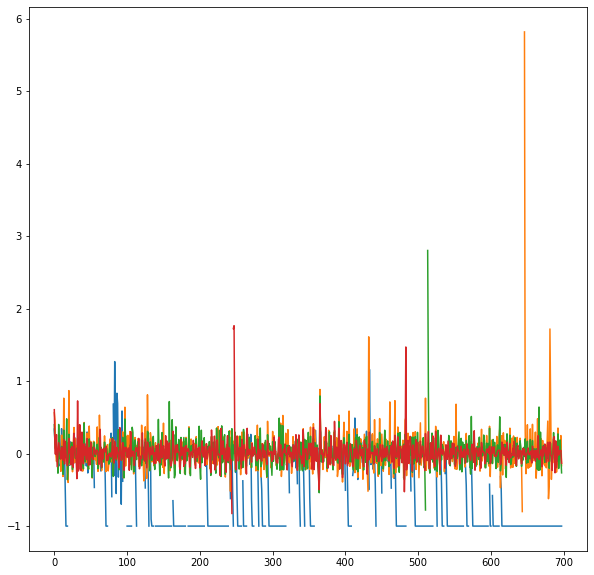

In [181]:
_ = plt.figure(figsize = (10, 10))
sns.lineplot(x = range(0, benz_sales.shape[1]), y = benz_sales.iloc[0, :].values)
sns.lineplot(x = range(0, benz_sales.shape[1]), y = benz_sales.iloc[1, :].values)
sns.lineplot(x = range(0, benz_sales.shape[1]), y = benz_sales.iloc[2, :].values)
sns.lineplot(x = range(0, benz_sales.shape[1]), y = benz_sales.iloc[3, :].values)

In [185]:
sales_pivoted[sales_pivoted['shop_id'] == 0]['Бензак'].values
_ = plt.figure(figsize = (10, 10))
sns.lineplot(x = range(0, benz_sales.shape[1]), y = benz_sales.iloc[0, :].values)

array([       nan, 0.33880611, 0.14071029, ...,        nan,        nan,
              nan])

По графикам видно, что ряды продаж у разных магазинов выглядят по разному. При этом это ряды не являются вертикальными сдвигами друг друга, то есть отличается не только объем продаж, но и его распределение по времени.

Есть небольшой возрастающий тренд

Будем разбивать магазины на группы, в которых временные ряды продаж ведут себя примерно одинаково. Будем рассматривать относительные величины продаж, а не абсолютные, т.к. в случае рассмотрения абсолютных величин мы получим кластеры, которым пренадлежат магазины с похожими объемами продаж товаров. Это не несет бизнес ценности, т.к. несмотря на похожие объемы, структура распределения продаж во времени может быть совершенно разной